In [1]:
import os
import getpass

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
git_user = "shyamal-anadkat" # Enter user or organization name
git_email = "" # Enter your email
repo_name = "DocumentImageCV" # Enter repo name
git_token = "" # Enter your github token
git_path = f"https://{git_token}@github.com/{git_user}/{repo_name}.git"
!git clone "{git_path}"

%cd DocumentImageCV
!pip install -r requirements.txt
%cd scripts
%ls

  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1
  Attempting uninstall: coverage
    Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter

/content/DocumentImageCV/scripts
clf.py               main.py           make_dataset_svm.py  model.py*
document_augment.py  make_dataset.py*  mlp.py               svm.py


## Main

torch:  1.10 ; cuda:  cu111


Copying files: 1221 files [00:01, 802.00 files/s]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([4, 3, 224, 224])


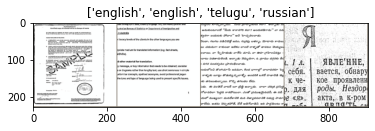

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [4, 64, 112, 112]           9,408
       BatchNorm2d-2          [4, 64, 112, 112]             128
              ReLU-3          [4, 64, 112, 112]               0
         MaxPool2d-4            [4, 64, 56, 56]               0
            Conv2d-5            [4, 64, 56, 56]          36,864
       BatchNorm2d-6            [4, 64, 56, 56]             128
              ReLU-7            [4, 64, 56, 56]               0
            Conv2d-8            [4, 64, 56, 56]          36,864
       BatchNorm2d-9            [4, 64, 56, 56]             128
             ReLU-10            [4, 64, 56, 56]               0
       BasicBlock-11            [4, 64, 56, 56]               0
           Conv2d-12            [4, 64, 56, 56]          36,864
      BatchNorm2d-13            [4, 64, 56, 56]             128
             ReLU-14            [4, 64,

/content/DocumentImageCV/scripts/model.py:188: RuntimeWarning: invalid value encountered in long_scalars
  recall = correct / total


Test set accuracy is 0.678
For class english, recall is 0.8958333333333334
For class russian, recall is 0.358974358974359
For class telugu, recall is 0.7352941176470589


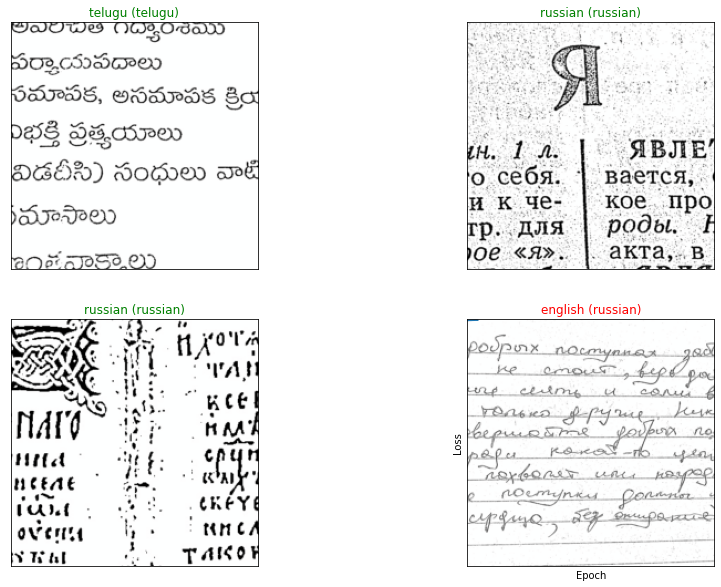

All done!
Saving model in "models" ------


In [2]:
%run main.py --epochs 10

# Playground below (modelling)

torch:  1.10 ; cuda:  cu111


Copying files: 1221 files [00:00, 1234.04 files/s]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([4, 3, 224, 224])


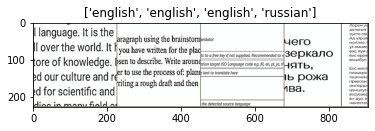

In [2]:
%run make_dataset.py

## Define our model architecture

We will used a pre-trained ResNet18 model, so our architecture has already been defined. The cell below loads the ResNet18 pre-trained model, freezes the model layers so that they are not trained during training (we will only train a final new layer which we will add on), and displays a summary of the model layers and the output shape of the input after passing through each layer.


In [20]:
# Instantiate pre-trained resnet
import copy
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchsummary import summary


net = torchvision.models.resnet34(pretrained=True)

# Shut off autograd for all layers to freeze model so the layer weights are not trained
#for param in net.parameters():
    #param.requires_grad = False

print(net)
# Display a summary of the layers of the model and output shape after each layer
summary(net,(images.shape[1:]),batch_size=4,device="cpu")

# Get the number of inputs to final Linear layer
num_ftrs = net.fc.in_features

# Replace final Linear layer with a new Linear with the same number of inputs but just 2 outputs,
# since we have 3 classes
net.fc = nn.Linear(in_features=num_ftrs, out_features=3)

summary(net,(images.shape[1:]),batch_size=4,device="cpu")

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Define cost function and optimizer
We will use Cross Entropy as the cost/loss function and SGD for the optimizer.

In [30]:
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=0.00004)
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.0001)

# Decay LR by a factor of 0.1 every 7 epochs

#lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

print(net)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Train the model

In [31]:
def train_model(model,
    criterion,
    optimizer,
    dataloaders,
    scheduler,
    device,
    dataset_sizes,
    num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            #if phase == 'train':
            #    scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [32]:
# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    net.cuda()

# Train the model
net = train_model(net,
    criterion,
    optimizer,
    dataloaders,
    None,
    device,
    dataset_sizes,
    num_epochs=50)

Epoch 0/49
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 0.7169 Acc: 0.7026
val Loss: 0.5730 Acc: 0.7851

Epoch 1/49
----------
train Loss: 0.6535 Acc: 0.7323
val Loss: 0.5018 Acc: 0.8264

Epoch 2/49
----------
train Loss: 0.7024 Acc: 0.7015
val Loss: 0.5801 Acc: 0.7686

Epoch 3/49
----------
train Loss: 0.6433 Acc: 0.7456
val Loss: 0.6012 Acc: 0.7355

Epoch 4/49
----------
train Loss: 0.6430 Acc: 0.7426
val Loss: 0.8643 Acc: 0.6198

Epoch 5/49
----------
train Loss: 0.6419 Acc: 0.7405
val Loss: 0.6997 Acc: 0.7025

Epoch 6/49
----------
train Loss: 0.6466 Acc: 0.7262
val Loss: 0.4290 Acc: 0.8512

Epoch 7/49
----------
train Loss: 0.6188 Acc: 0.7477
val Loss: 0.6740 Acc: 0.6860

Epoch 8/49
----------
train Loss: 0.6209 Acc: 0.7374
val Loss: 1.2311 Acc: 0.6446

Epoch 9/49
----------
train Loss: 0.6084 Acc: 0.7323
val Loss: 0.6065 Acc: 0.7521

Epoch 10/49
----------
train Loss: 0.5909 Acc: 0.7733
val Loss: 0.5522 Acc: 0.7686

Epoch 11/49
----------
train Loss: 0.5629 Acc: 0.7754
val Loss: 0.5722 Acc: 0.8347

Epoch 12/49
----------
t

In [33]:
torch.save(net.state_dict(), 'modelfinal.pt')

## Visualize Results

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


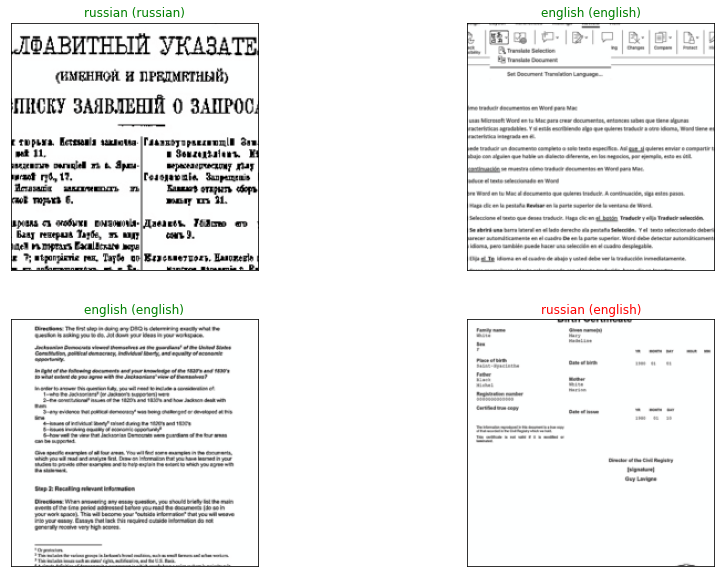

In [34]:
# Display a batch of predictions
def visualize_results(model,images,class_names, dataloaders, device):
    model = model.to(device) # Send model to GPU if available
    with torch.no_grad():
        model.eval()
        # Get a batch of validation images
        images, labels = iter(dataloaders['val']).next()
        images, labels = images.to(device), labels.to(device)
        # Get predictions
        _,preds = torch.max(model(images), 1)
        preds = np.squeeze(preds.cpu().numpy())
        images = images.cpu().numpy()

    # Plot the images in the batch, along with predicted and true labels
    fig = plt.figure(figsize=(15, 10))
    for idx in np.arange(len(preds)):
        ax = fig.add_subplot(2, len(preds)//2, idx+1, xticks=[], yticks=[])
        image = images[idx]
        image = image.transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)
        ax.imshow(image)
        ax.set_title("{} ({})".format(class_names[preds[idx]], class_names[labels[idx]]),
                    color=("green" if preds[idx]==labels[idx] else "red"))
    return

visualize_results(net, images, class_names, dataloaders, device)

In [35]:
def test_model(model,test_loader,device):
    model = model.to(device)
    # Turn autograd off
    with torch.no_grad():

        # Set the model to evaluation mode
        model.eval()

        # Set up lists to store true and predicted values
        y_true = []
        test_preds = []

        # Calculate the predictions on the test set and add to list
        for data in test_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            # Feed inputs through model to get raw scores
            logits = net.forward(inputs)
            # Convert raw scores to probabilities (not necessary since we just care about discrete probs in this case)
            probs = F.softmax(logits,dim=1)
            # Get discrete predictions using argmax
            preds = np.argmax(probs.cpu().numpy(),axis=1)
            # Add predictions and actuals to lists
            test_preds.extend(preds)
            y_true.extend(labels)

        # Calculate the accuracy
        test_preds = np.array(test_preds)
        y_true = np.array(y_true)
        test_acc = np.sum(test_preds == y_true)/y_true.shape[0]
        
        # Recall for each class
        recall_vals = []
        for i in range(10):
            class_idx = np.argwhere(y_true==i)
            total = len(class_idx)
            correct = np.sum(test_preds[class_idx]==i)
            recall = correct / total
            recall_vals.append(recall)
    
    return test_acc,recall_vals

In [36]:
# Test the pre-trained model
acc,recall_vals = test_model(net,dataloaders['val'],device)
print('Test set accuracy is {:.3f}'.format(acc))
for i in range(3):
    print('For class {}, recall is {}'.format(class_names[i],recall_vals[i]))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Test set accuracy is 0.926
For class english, recall is 0.8958333333333334
For class russian, recall is 0.8974358974358975
For class telugu, recall is 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in long_scalars
